In [1]:
from __future__ import division
import numpy as np
from scipy.integrate import solve_ivp
from scipy import interpolate 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import date
import datetime
from myfunctions_multi_scale import *
%matplotlib inline

In [2]:
x1 = pd.ExcelFile('../data/input.xlsx')
df1 = x1.parse('Parameters_Reading',header=None)

# assigmment of parameters to values: 
for key,val in zip(df1.iloc[:][0],df1.iloc[:][1]):
    exec(key + '=val')
    print(key,val)

n_reactors = np.int(n_reactors)

umol_to_percent_DW 0.0014
n_days 14.0
Next0 110.0
Nint0 1.05
m0 0.19724999999999998
S 35.0
Nintcrit 2.0
n_reactors 1.0
Qp 459.5833333333333
Qsea 224910.0
Nsea 110.0
dilution 0.0
miu 0.027
Nintmax 4.2
Nintmin 0.7
KN 1.2
Ks 14.0
Vmax 60.0
Z 1.0
KI 20.0
K0 1.5
Ka 0.15
Topt 18.0
Tmin 5.0
Tmax 31.5
n 2.0
losses20 0.0016
teta 1.047
Sopt 18.0
Smin 0.0
Smax 45.0
Shigh 30.0
Slow 12.0


[0.9507728396038352,
 0.8926325625289203,
 0.8171599394527023,
 0.729423570749643,
 0.6348789122428466,
 0.5388158895209999,
 0.445890552156327,
 0.3597945077825237,
 0.2830865087323712,
 0.21718118506272827,
 0.16246641904196243]

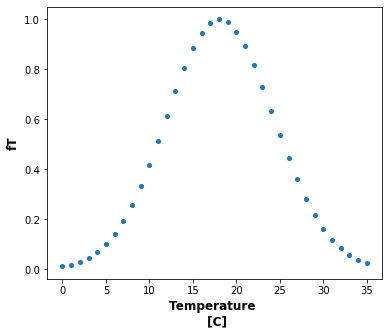

In [3]:
# Temperature growth function
n = 2
Tmax = 31.5
Topt = 18
T = list(range(0,36))
fTT = []

for Temp in T:
    if Temp <= Topt:
        Tx = Tmin
    else:
        Tx = Tmax
    fT = np.exp(-2.3 * ((Temp - Topt) / (Tx - Topt))**n) # Temp from temperature data
    fTT.append(fT)

fig,ax = plt.subplots(1,1,sharex=True,figsize=(6,5))
ax.plot(T,fTT,'.',markersize=8)
ax.set_ylabel('fT',fontsize=12, weight="bold")
ax.set_xlabel('Temperature \n [C]',fontsize=12, weight="bold")

fTT[20:31]

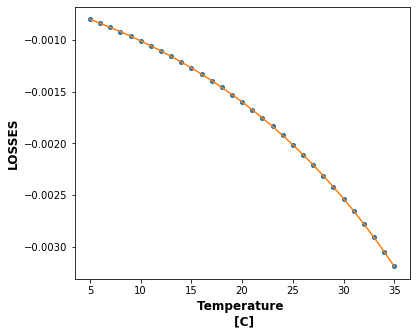

In [4]:
# Temperature losses function

T = list(range(5,36))

LOSSES = []
for Temp in T:
    losses = -losses20 * teta ** (Temp - 20)
    LOSSES.append(losses)

fig,ax = plt.subplots(1,1,sharex=True,figsize=(6,5))
ax.plot(T,LOSSES,'.',markersize=8)
ax.set_ylabel('LOSSES',fontsize=12, weight="bold")
ax.set_xlabel('Temperature \n [C]',fontsize=12, weight="bold")

plt.plot(T,LOSSES)

0.9523990933160632


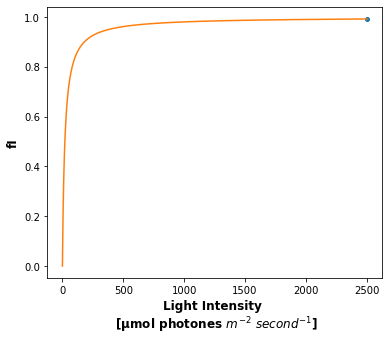

In [5]:
# light function

I_all = np.linspace(0,2500,2500)
fII = []
for I in I_all:
    fI = I / (I + KI)
    fII.append(fI)

fig,ax = plt.subplots(1,1,sharex=True,figsize=(6,5))
ax.plot(I,fI,'.',markersize=8)
ax.set_ylabel('fI',fontsize=12, weight="bold")
ax.set_xlabel('Light Intensity \n [µmol photones $m^{-2}$ $second^{-1}$]',fontsize=12, weight="bold")

plt.plot(I_all,fII)
print(fII[400])

0.9593328490204683
0.9598809918223395


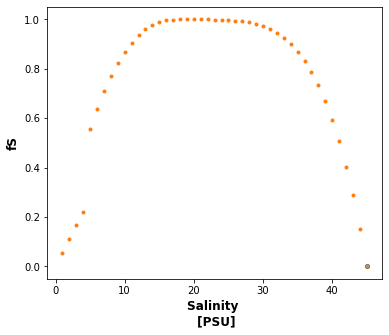

In [6]:
# S (salinity) function

Salinity = list(range(1,46))
fSS = []

for S in Salinity:
    if S < Sopt:
        Sx = Smin
        n = 2.5
        if S < 5:
            fS = ((S - Smin)/(Sopt - Sx))
            fSS.append(fS)
        elif S >= 5:
            fS = 1 - ((S - Sopt)/(Sx - Sopt)) ** n           
            fSS.append(fS)
    elif S >= Sopt:
        Sx = Smax
        n = 4.4 # found by solver in fs file
        fS = 1 - ((S - Sopt)/(Sx - Sopt)) ** n
        fSS.append(fS)
        
fig,ax = plt.subplots(1,1,sharex=True,figsize=(6,5))
ax.plot(S,fS,'.',markersize=8)
ax.set_ylabel('fS',fontsize=12, weight="bold")
ax.set_xlabel('Salinity \n [PSU]',fontsize=12, weight="bold")

plt.plot(Salinity,fSS,'.')

print(fSS[12])
print(fSS[30])

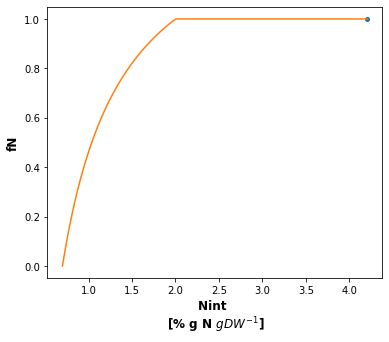

In [7]:
# N function

Nint_all = np.linspace(Nintmin,Nintmax,100)
fNN = []
for Nint in Nint_all:
    if Nint >= Nintcrit:
        fN = 1
        fNN.append(fN)
    else:
        fN = ((Nint - Nintmin)/Nint) / ((Nintcrit - Nintmin)/Nintcrit)  # units: [ ]
        fNN.append(fN)

fig,ax = plt.subplots(1,1,sharex=True,figsize=(6,5))
ax.plot(Nint,fN,'.',markersize=8)
ax.set_ylabel('fN',fontsize=12, weight="bold")
ax.set_xlabel('Nint \n [% g N $g DW^{-1}$] ',fontsize=12, weight="bold")

plt.plot(Nint_all,fNN)